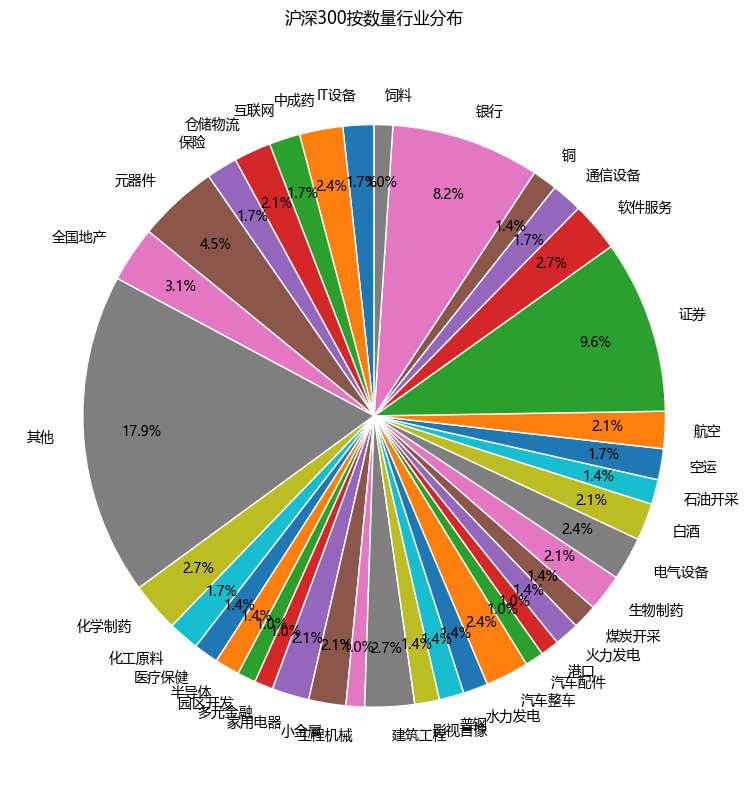

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 微软雅黑

holding_calendar = pd.read_parquet('../data/component_calendar.parquet')
stock_df = pd.read_parquet('../data/stock_list.parquet')
market = pd.read_parquet('../data/market.parquet')

'''magic_df = pd.DataFrame({'share_code':['601989.SH'],
                         'industry':['军事工业']})'''
magic_df = pd.DataFrame({'share_code':['000627.SZ'],
                         'industry':['化学工业']})

check_date = '2020-01-02'

first_period_holding = holding_calendar[holding_calendar['trade_date'] == pd.to_datetime(check_date)].copy(deep=True)

first_period_holding = pd.merge(first_period_holding, stock_df, how='left', on='share_code')
#first_period_holding = first_period_holding[first_period_holding['share_code'] != '601989.SH']
first_period_holding = first_period_holding[first_period_holding['share_code'] != '000627.SZ']
first_period_holding = pd.concat([first_period_holding, magic_df])

kl_selection_result = first_period_holding[['share_code','name','fullname','industry']]

industry_num = first_period_holding['industry'].value_counts().reset_index()
industry_num['industry'] = np.where(industry_num['count'] <= 2, '其他', industry_num['industry'])
#industry_num = industry_num.to_frame()
industry_sum = industry_num.groupby('industry', as_index=False)['count'].sum()
industry_sum = industry_sum.set_index('industry')['count'].squeeze()

plt.figure(1,figsize=(8,8))

industry_sum.plot(kind='pie',
           autopct='%1.1f%%',
           startangle=90,
           labeldistance=1.1,
           pctdistance=0.8,
           wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.title('沪深300按数量行业分布', pad=20)
plt.ylabel('')
plt.tight_layout()
plt.savefig(f'../figures/300industry_dist_num {check_date}.png')
plt.savefig(f'../figures/300industry_dist_num.eps {check_date}', format='eps')